In [1]:
 ## https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [2]:
import pandas as pd

Read data

In [3]:
df=pd.read_csv("Data/diabetes_prediction_dataset.csv")

In [4]:
df.head().sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.describe(include="O")

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.age = df.age.astype(int)

In [10]:
import matplotlib.pyplot as plt

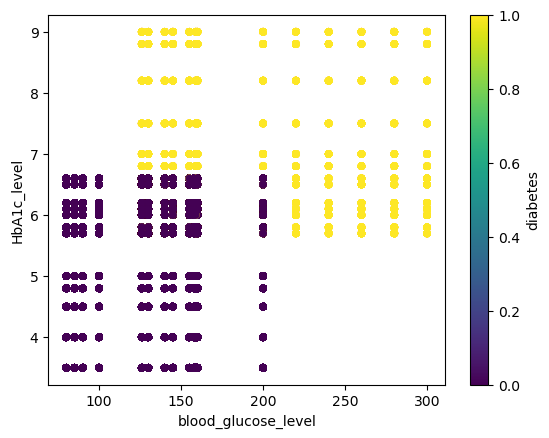

In [11]:
df.plot(x='blood_glucose_level', y='HbA1c_level', kind='scatter', c='diabetes', colormap='viridis')
plt.show()

transform categorical columns

In [12]:
from sklearn.preprocessing import LabelEncoder

df[["gender", "smoking_history"]] = df[["gender", "smoking_history"]].apply(LabelEncoder().fit_transform)

In [13]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [14]:
X = df.drop("diabetes", axis = 1)
y = df.diabetes

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [16]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix

In [21]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt) * 100)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print("Classification Report\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_dt))

Accuracy Score:  94.965
Mean Squared Error:  0.05035
F1 Score:  0.7135135135135136
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18297
           1       0.69      0.74      0.71      1703

    accuracy                           0.95     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000

Confusion Matrix
 [[17739   558]
 [  449  1254]]


In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf) * 100)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))
print("Classification Report\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_rf))

Accuracy Score:  97.055
Mean Squared Error:  0.02945
F1 Score:  0.8002712783994574
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.95      0.69      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix
 [[18231    66]
 [  523  1180]]


In [23]:
#XG Boost
from xgboost import XGBClassifier

xg_classifier = XGBClassifier(learning_rate = 0.5, n_estimators = 100)
xg_classifier.fit(X_train, y_train)
y_pred_xg = xg_classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_xg) * 100)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_xg))
print("F1 Score: ", f1_score(y_test, y_pred_xg))
print("Classification Report\n", classification_report(y_test, y_pred_xg))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_xg))

Accuracy Score:  97.03500000000001
Mean Squared Error:  0.02965
F1 Score:  0.8017385489802742
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.93      0.70      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix
 [[18208    89]
 [  504  1199]]


In [25]:
#cat Boost
from catboost import CatBoostClassifier

cb_classifier = CatBoostClassifier(learning_rate=0.5, n_estimators=100)
cb_classifier.fit(X_train, y_train)

0:	learn: 0.3547696	total: 14.3ms	remaining: 1.41s
1:	learn: 0.2304813	total: 25.5ms	remaining: 1.25s
2:	learn: 0.1706219	total: 34.9ms	remaining: 1.13s
3:	learn: 0.1342434	total: 42.1ms	remaining: 1.01s
4:	learn: 0.1140619	total: 48.5ms	remaining: 921ms
5:	learn: 0.1015065	total: 55.1ms	remaining: 864ms
6:	learn: 0.0958088	total: 61.7ms	remaining: 820ms
7:	learn: 0.0906094	total: 70ms	remaining: 805ms
8:	learn: 0.0870270	total: 77.2ms	remaining: 781ms
9:	learn: 0.0857500	total: 84.9ms	remaining: 764ms
10:	learn: 0.0839062	total: 92.6ms	remaining: 749ms
11:	learn: 0.0823687	total: 99.1ms	remaining: 727ms
12:	learn: 0.0819095	total: 106ms	remaining: 708ms
13:	learn: 0.0812076	total: 113ms	remaining: 693ms
14:	learn: 0.0805610	total: 119ms	remaining: 676ms
15:	learn: 0.0802224	total: 127ms	remaining: 666ms
16:	learn: 0.0798561	total: 133ms	remaining: 652ms
17:	learn: 0.0795753	total: 140ms	remaining: 639ms
18:	learn: 0.0791492	total: 146ms	remaining: 625ms
19:	learn: 0.0789402	total: 154

In [26]:
y_pred_cb = cb_classifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_cb) * 100)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_cb))
print("F1 Score: ", f1_score(y_test, y_pred_cb))
print("Classification Report\n", classification_report(y_test, y_pred_cb))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_cb))

Accuracy Score:  97.16
Mean Squared Error:  0.0284
F1 Score:  0.8068027210884353
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.96      0.70      0.81      1703

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix
 [[18246    51]
 [  517  1186]]
